
# 🎬 Netflix-Style Movie Recommendation System (Content-Based Filtering)

This project is a **Content-Based Movie Recommender** built using the IMDb Top 1000 Movies dataset from Kaggle  
([harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows)).

We aim to recommend similar movies (like Netflix does) based on **metadata** such as Genre, Director, Cast, and Overview.

---


In [19]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Display settings
pd.set_option('display.max_colwidth', 200)


## 📂 Load Dataset

In [20]:

# Load the IMDb dataset
movies = pd.read_csv("imdb_top_1000.csv")
movies.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,"https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg",The Shawshank Redemption,1994,A,142 min,Drama,9.3,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,"https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg",The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,"https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_UX67_CR0,0,67,98_AL_.jpg",The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,"https://m.media-amazon.com/images/M/MV5BMWMwMGQzZTItY2JlNC00OWZiLWIyMDctNDk2ZDQ2YjRjMWQ0XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg",The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,"https://m.media-amazon.com/images/M/MV5BMWU4N2FjNzYtNTVkNC00NzQ0LTg0MjAtYTJlMjFhNGUxZDFmXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg",12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## 📊 Exploratory Data Analysis (EDA)

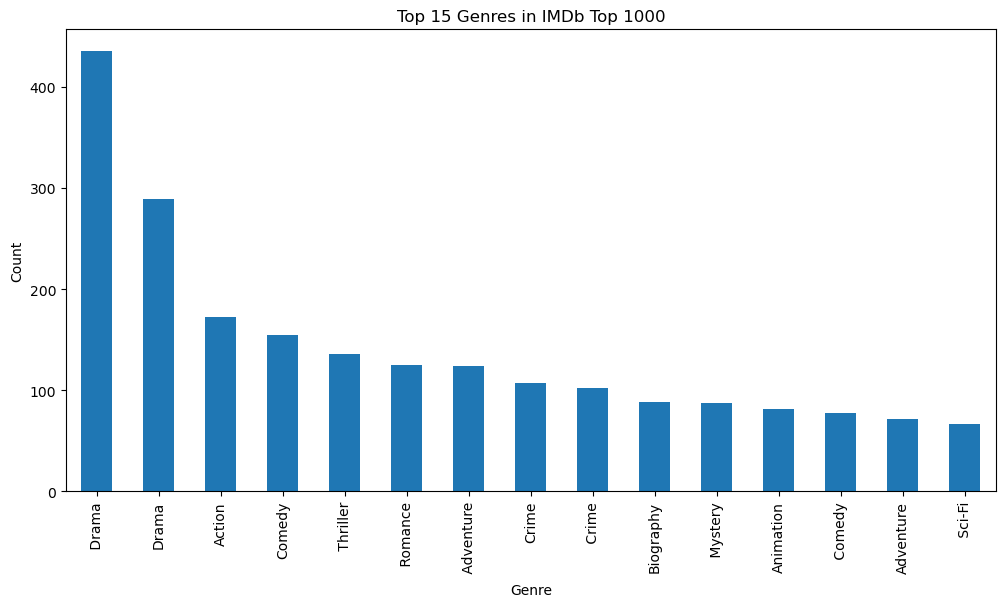

In [21]:

# Genre distribution
plt.figure(figsize=(12,6))
movies['Genre'].str.split(',').explode().value_counts()[:15].plot(kind='bar')
plt.title("Top 15 Genres in IMDb Top 1000")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


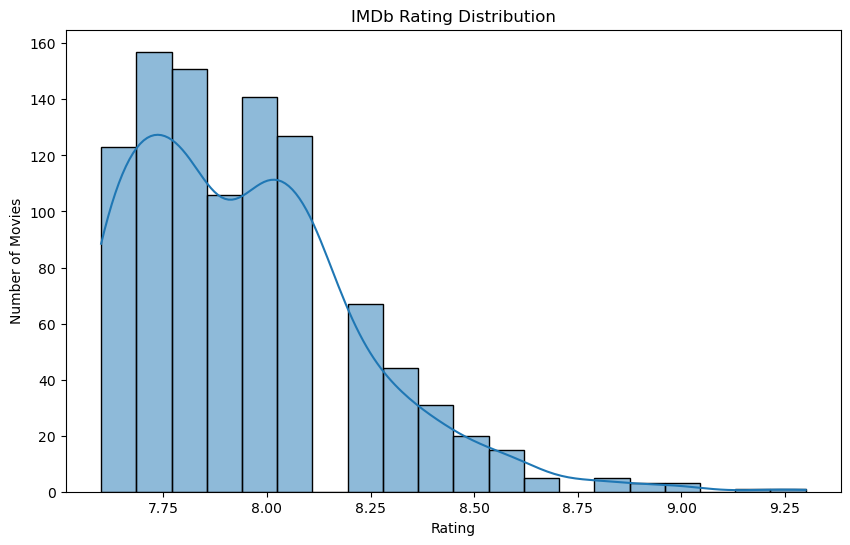

In [22]:

# IMDb Rating distribution
plt.figure(figsize=(10,6))
sns.histplot(movies['IMDB_Rating'], bins=20, kde=True)
plt.title("IMDb Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.show()


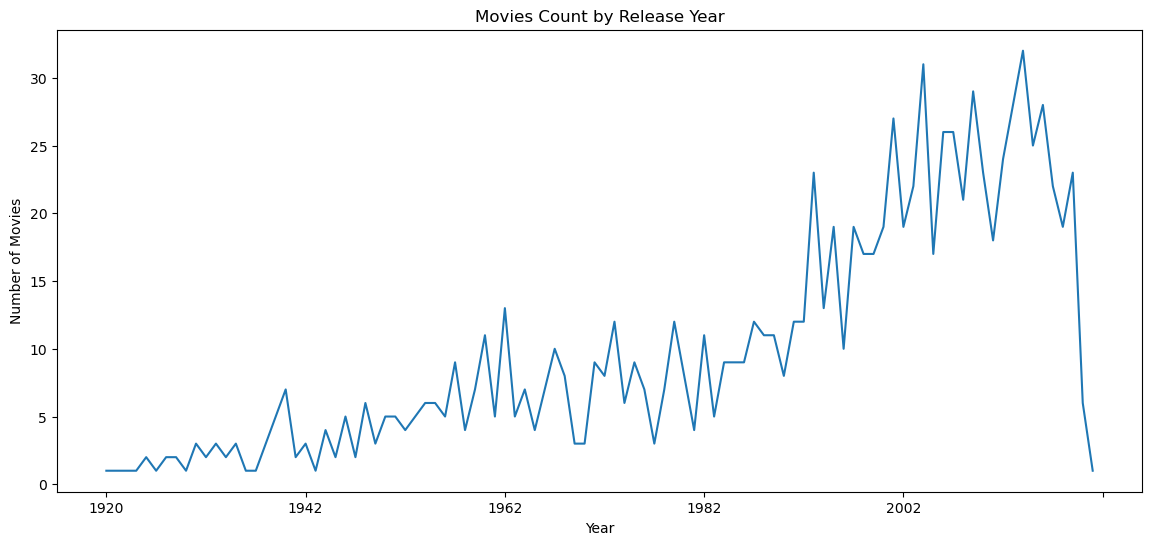

In [23]:

# Movies by Year
plt.figure(figsize=(14,6))
movies['Released_Year'].value_counts().sort_index().plot(kind='line')
plt.title("Movies Count by Release Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()


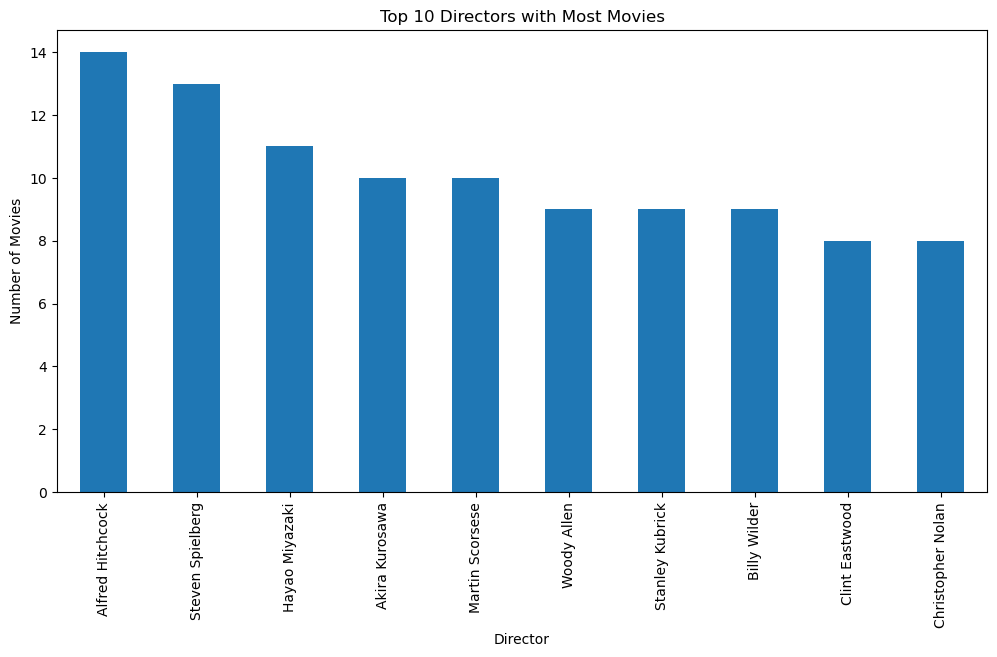

In [24]:

# Top 10 Directors
plt.figure(figsize=(12,6))
movies['Director'].value_counts()[:10].plot(kind='bar')
plt.title("Top 10 Directors with Most Movies")
plt.xlabel("Director")
plt.ylabel("Number of Movies")
plt.show()


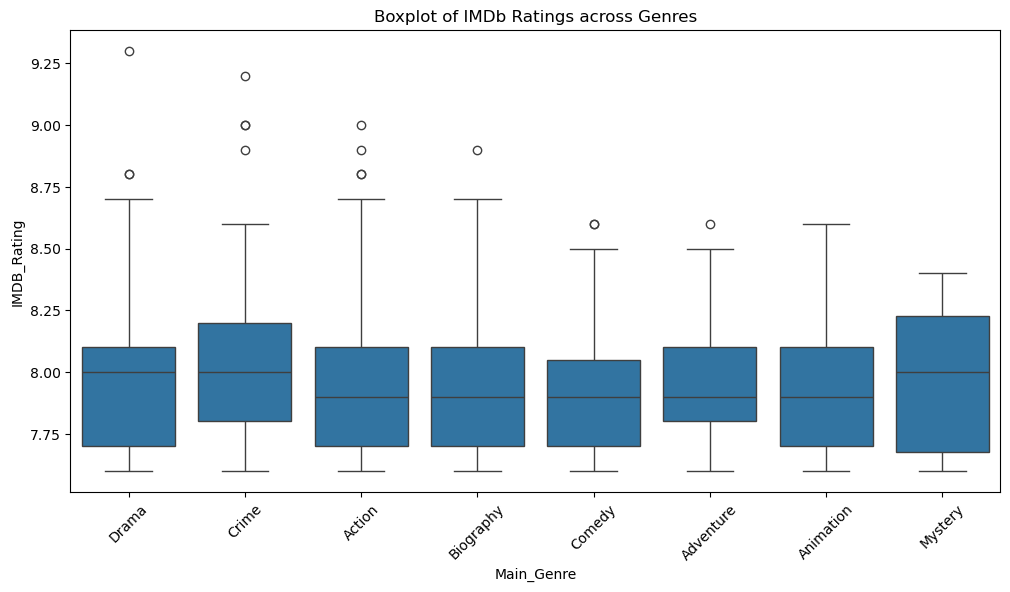

In [25]:
# Extract main genre (first genre only)
movies['Main_Genre'] = movies['Genre'].str.split(',').str[0]

# Boxplot: IMDb Ratings across Top Genres
top_genres = movies['Main_Genre'].value_counts().index[:8]
plt.figure(figsize=(12,6))
sns.boxplot(x='Main_Genre', y='IMDB_Rating', 
            data=movies[movies['Main_Genre'].isin(top_genres)])
plt.title("Boxplot of IMDb Ratings across Genres")
plt.xticks(rotation=45)
plt.show()


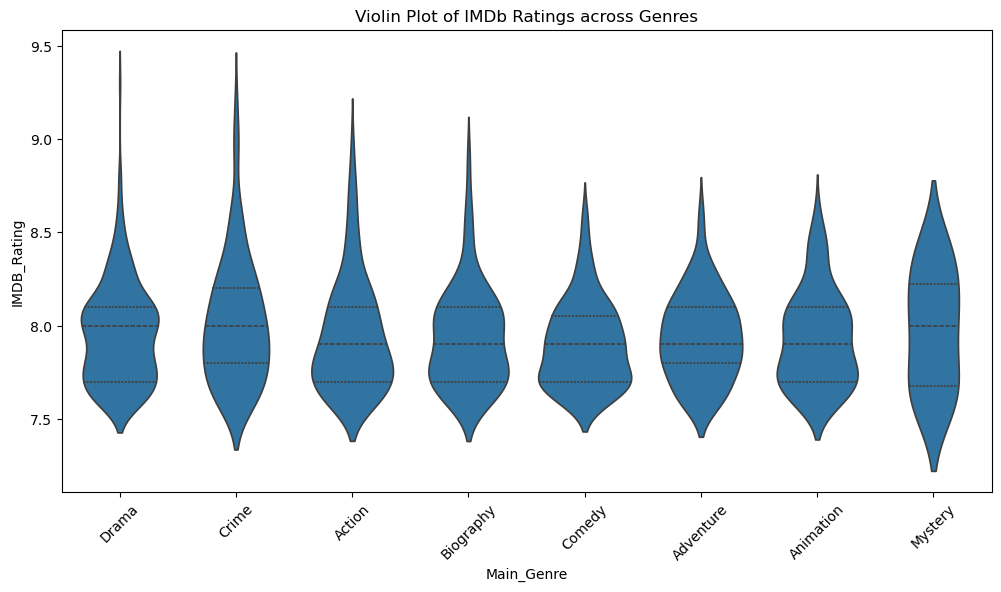

In [26]:
# Violin Plot: IMDb Ratings distribution across Genres
plt.figure(figsize=(12,6))
sns.violinplot(x='Main_Genre', y='IMDB_Rating', 
               data=movies[movies['Main_Genre'].isin(top_genres)], 
               inner='quartile')
plt.title("Violin Plot of IMDb Ratings across Genres")
plt.xticks(rotation=45)
plt.show()


In [27]:
# --- Main Genre Extraction ---
movies['Main_Genre'] = movies['Genre'].str.split(',').str[0]
top_genres = movies['Main_Genre'].value_counts().index[:8]


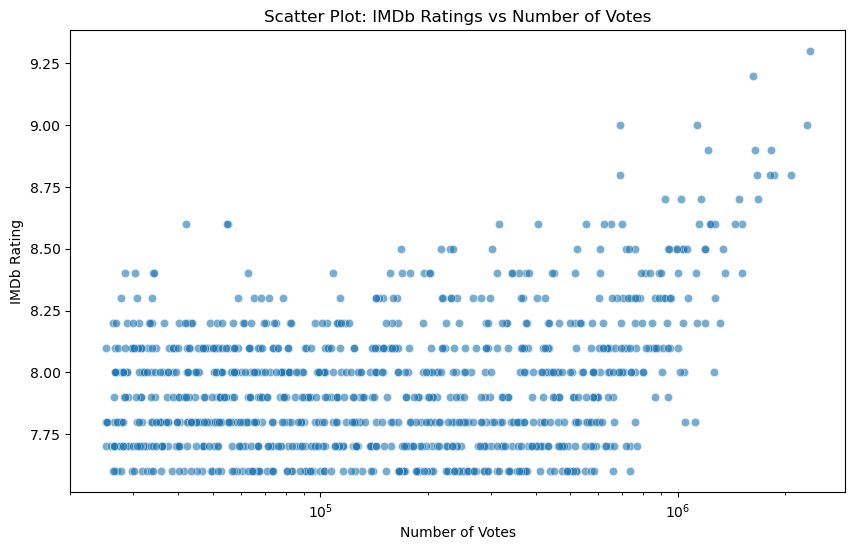

In [28]:
# --- Scatter Plot: Ratings vs Votes ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='No_of_Votes', y='IMDB_Rating', data=movies, alpha=0.6)
plt.title("Scatter Plot: IMDb Ratings vs Number of Votes")
plt.xlabel("Number of Votes")
plt.ylabel("IMDb Rating")
plt.xscale('log')  # log scale for better visualization
plt.show()


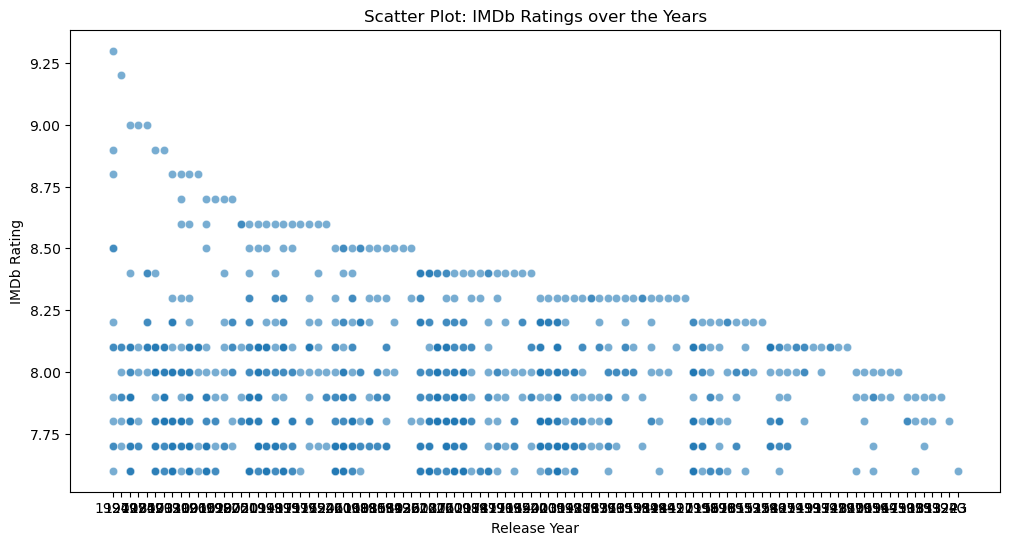

In [29]:
# --- Scatter Plot: Ratings vs Year ---
plt.figure(figsize=(12,6))
sns.scatterplot(x='Released_Year', y='IMDB_Rating', data=movies, alpha=0.6)
plt.title("Scatter Plot: IMDb Ratings over the Years")
plt.xlabel("Release Year")
plt.ylabel("IMDb Rating")
plt.show()


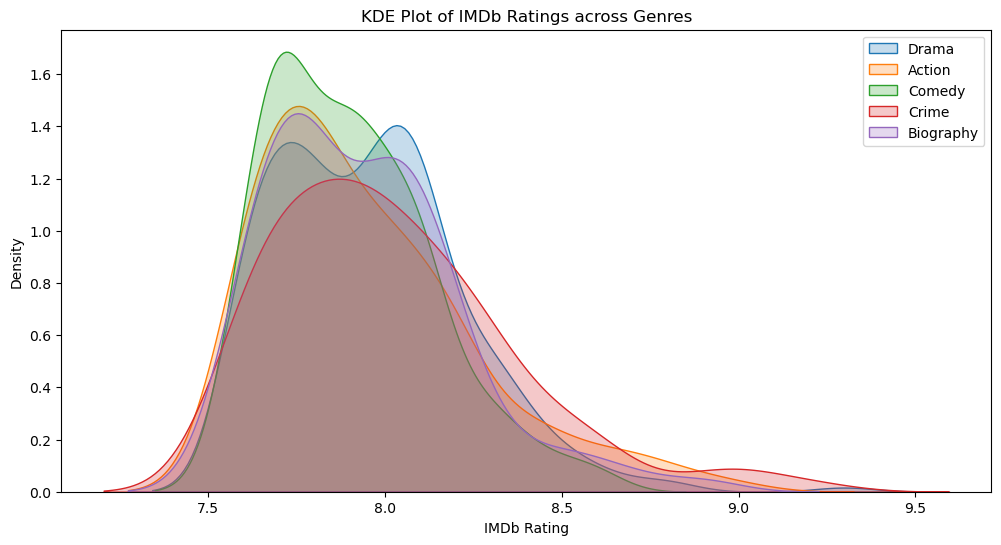

In [30]:
# --- KDE Plot: Ratings Distribution by Genre ---
plt.figure(figsize=(12,6))
for genre in top_genres[:5]:  # first 5 top genres for clarity
    sns.kdeplot(movies[movies['Main_Genre']==genre]['IMDB_Rating'], label=genre, fill=True)
plt.title("KDE Plot of IMDb Ratings across Genres")
plt.xlabel("IMDb Rating")
plt.ylabel("Density")
plt.legend()
plt.show()


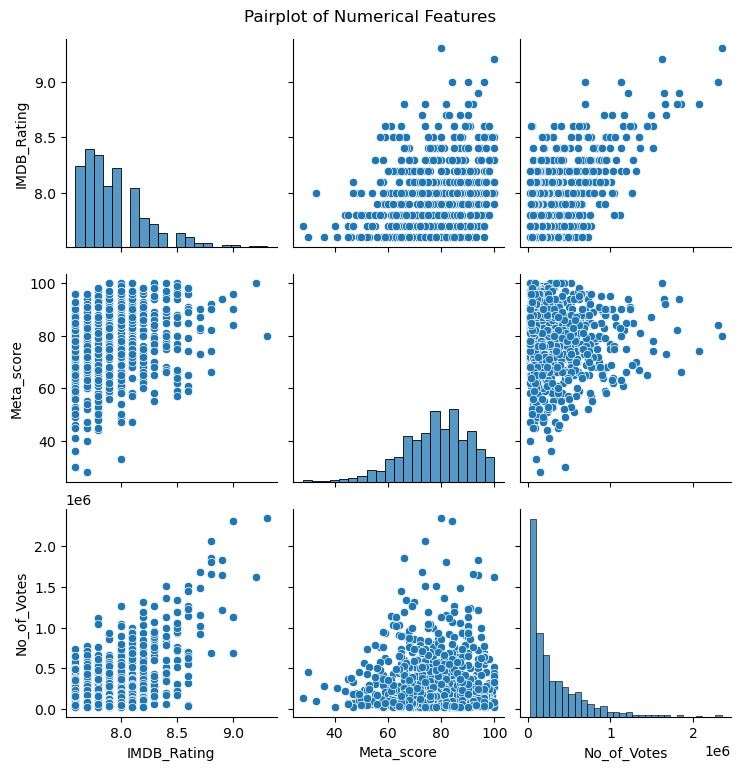

In [31]:
# --- Pairplot of numerical features ---
sns.pairplot(movies[['IMDB_Rating','Released_Year','Meta_score','No_of_Votes']].dropna())
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


## 🧹 Data Preprocessing

In [32]:

# Combine metadata into a single content column
movies['content'] = (
    movies['Genre'].fillna('') + " " +
    movies['Director'].fillna('') + " " +
    movies['Star1'].fillna('') + " " +
    movies['Star2'].fillna('') + " " +
    movies['Star3'].fillna('') + " " +
    movies['Star4'].fillna('') + " " +
    movies['Overview'].fillna('')
).str.lower()

movies[['Series_Title','content']].head(5)


,Series_Title,content
0,The Shawshank Redemption,"drama frank darabont tim robbins morgan freeman bob gunton william sadler two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency."
1,The Godfather,"crime, drama francis ford coppola marlon brando al pacino james caan diane keaton an organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son."
2,The Dark Knight,"action, crime, drama christopher nolan christian bale heath ledger aaron eckhart michael caine when the menace known as the joker wreaks havoc and chaos on the people of gotham, batman must accept..."
3,The Godfather: Part II,"crime, drama francis ford coppola al pacino robert de niro robert duvall diane keaton the early life and career of vito corleone in 1920s new york city is portrayed, while his son, michael, expand..."
4,12 Angry Men,"crime, drama sidney lumet henry fonda lee j. cobb martin balsam john fiedler a jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence."


## 🔎 Feature Extraction & Similarity

In [33]:

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['content'])

# Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


## 🎯 Recommendation Function

In [34]:

# Map indices
indices = pd.Series(movies.index, index=movies['Series_Title']).drop_duplicates()

def recommend(title, topn=10):
    if title not in indices:
        return "Movie not found!"
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:topn+1]
    movie_indices = [i[0] for i in sim_scores]
    return movies[['Series_Title','Genre','IMDB_Rating']].iloc[movie_indices]


In [39]:
# Recommender System ML Workflow

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pickle

# Load dataset (make sure imdb_top_1000.csv is in the same folder)
movies = pd.read_csv("imdb_top_1000.csv")

# Fill missing values to avoid errors
movies = movies.fillna("")

# Combine metadata into a single string per movie
movies['metadata'] = (
    movies['Genre'].astype(str) + " " +
    movies['Director'].astype(str) + " " +
    movies['Star1'].astype(str) + " " +
    movies['Star2'].astype(str) + " " +
    movies['Star3'].astype(str) + " " +
    movies['Star4'].astype(str) + " " +
    movies['Overview'].astype(str)
)

# Try different vectorizers
vectorizers = {
    "TF-IDF": TfidfVectorizer(stop_words='english'),
    "Count": CountVectorizer(stop_words='english'),
    "Hashing": HashingVectorizer(stop_words='english', alternate_sign=False)
}

results = {}
models = {}

for name, vectorizer in vectorizers.items():
    X = vectorizer.fit_transform(movies['metadata'])
    cosine_sim = cosine_similarity(X, X)
    
    # Simple evaluation: average top-5 similarity for each movie (higher is better)
    avg_top5 = []
    for row in cosine_sim:
        sims = np.sort(row)[-6:-1]  # top 5 excluding self
        avg_top5.append(np.mean(sims))
    score = np.mean(avg_top5)
    results[name] = score
    models[name] = {"vectorizer": vectorizer, "cosine_sim": cosine_sim}
    print(f"{name} average top-5 similarity score: {score:.4f}")

# Pick best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print("\\nBest model:", best_model_name, "with score:", results[best_model_name])

# Save best model with pickle
payload = {
    "vectorizer": best_model['vectorizer'],
    "cosine_sim": best_model['cosine_sim'],
    "df": movies,
    "indices": pd.Series(movies.index, index=movies['Series_Title'].astype(str)).to_dict()
}

with open("best_netflix_recommender.pkl", "wb") as f:
    pickle.dump(payload, f)

print("Best recommender saved as best_netflix_recommender.pkl")


TF-IDF average top-5 similarity score: 0.1218
Count average top-5 similarity score: 0.1963
Hashing average top-5 similarity score: 0.1964
\nBest model: Hashing with score: 0.19635479540752543
Best recommender saved as best_netflix_recommender.pkl


## ✅ Example Recommendation

In [ ]:

# Example: Recommend 10 movies similar to Inception
recommend("Inception")


,Series_Title,Genre,IMDB_Rating
155,Batman Begins,"Action, Adventure",8.2
754,(500) Days of Summer,"Comedy, Drama, Romance",7.7
21,Interstellar,"Adventure, Drama, Sci-Fi",8.6
934,Mysterious Skin,Drama,7.6
907,50/50,"Comedy, Drama, Romance",7.6
412,Kagemusha,"Drama, History, War",8.0
784,The Last Samurai,"Action, Drama",7.7
36,The Prestige,"Drama, Mystery, Sci-Fi",8.5
496,Letters from Iwo Jima,"Action, Adventure, Drama",7.9
243,Catch Me If You Can,"Biography, Crime, Drama",8.1



## 🏁 Conclusion

- We built a **Content-Based Filtering Recommender System**.  
- It recommends movies based on **metadata similarity** using **TF-IDF + Cosine Similarity**.  
- Example: If you like *Inception*, it will suggest similar movies like *Interstellar*, *The Matrix*, etc.  
- This approach is simple, explainable, and works even without user ratings.  

---

## ⚙️ Requirements (for `requirements.txt`)

```
pandas
numpy
matplotlib
seaborn
scikit-learn
```
